# Working with sequons

Proteins are glycosylated at glycosylation sites which are defined by a small local sequence of amino acids called _sequons_. For instance, the standard `N-glycosylation` takes place at Asparagines that are not followed by a Proline and have a Serine or Theronine immediate following. We can define our own sequons in Glycosylator and in this tutorial we will cover how. 

In [1]:
import glycosylator as gl

### The `Sequon` class

Each sequon in Glycosylator is handled by a `Sequon` object. This object stores a `regex` pattern to obtain residues, and data on linkages to apply when glycosylating. Essentially, a Sequon is a local mapping to find residues and decide on linkages to use when connecting glycans to said residues. 

Let's get the standard sequon for `N-linked` glycosylation. We can use the `get_sequon` function to obtain the Sequon object. 

In [2]:
sequon = gl.get_sequon("N-linked")

# let's check out the sequon's regex pattern that finds amino acids from a sequence
sequon.pattern

'(N)(?=[A-OQ-Z][ST])'

The pattern above contains one *capturing group*, which is absolutely crucial! We have the sequence that is being matched but only one of the amino acids is of interest, the first asparagine `(N)`. If you are not sure what you just read about "capturing groups", or you are unfabiliar with regex, be sure to read up a little on how to define regex patterns (they will superboost your productivity :-)). Here is a [short intro](https://adyork.github.io/regex-intro/01-regex-intro/index.html) and here a [slightly longer one](https://regexone.com/). 

The pattern is one half of what a Sequon is, the second half concerns linkages. Because a sequon can have capturing groups for multiple amino acids, it is important that the sequon defines what type of linkage to use in case of each amino acid. Below are the linkages defined by the N-linked sequon:

In [3]:
sequon.linkages

{'ASN': 'ASN-glyco'}

As you can see it is imply a dictionary mapping the three letter code of the amino acid to another string. This other string is the label of a *defined linkage*. When defining our own sequons we need to be sure to also define appropriate linkages and add them to Glycosylator's default Topology (if we cannot use existing ones). By the way, if the part about defining linkages and adding them to a topology was cryptonite to you, go check out the [Biobuild tutorial](https://biobuild.readthedocs.io/en/latest/examples/default_settings.html) on default resources.

In [4]:
gl.has_linkage("ASN-glyco")

True

## Defining a new sequon

If we want to define a new sequon we can initialize a new `Sequon` instance using a regex pattern with one capturing group for a one-letter amino acid sequence. 
Let's make a creative sequon for Asparagines that are surrounded on either side by a close-by Leucine...

In [5]:
new_sequon = gl.Sequon("new sequon", "(?=.{0,3}L)(N)(?=.{0,3}L)")

Once this is done we need to define which linkage to use when an asparagine is found using this sequon. Luckily, a linkage for glycosylating asparagines already exists (its the `ASN-glyco` we saw above), but let's go all the way and actually define the linkage as well... 

In [6]:
# define the same linkage as ASN-glyco (just to illustrate)
new_linkage = gl.linkage("ND2", "C1", ["HD21"], ["O1", "HO1"], id="new_linkage")

# add the linkage so glycosylator knows about it
gl.add_linkage(new_linkage)

# add the linkage to the sequon
new_sequon.add_linkage("ASN", "new_linkage")

# if we had a pattern with a capturing group like (N|S)
# we must also provide a new_sequon.add_linkage("SER", <some linkage id>)

Now we can check what the new sequon looks like 

In [7]:
print(new_sequon.pattern, new_sequon.linkages, gl.has_linkage("new_linkage"), sep="\n")

(?=.{0,3}L)(N)(?=.{0,3}L)
{'ASN': 'new_linkage'}
True


Alrighty, let's test out if our sequon works. Let's load a protein scaffold and use the `find_glycosylation_sites` method to search for asparagines that would fulfill our custom sequon's requirments.

In [8]:
protein = gl.protein("files/4tvp.prot.pdb")
_ = protein.infer_bonds()

In [9]:
protein.find_glycosylation_sites(new_sequon)

{Chain(G): [Residue(ASN, 33),
  Residue(ASN, 262),
  Residue(ASN, 283),
  Residue(ASN, 339)],
 Chain(B): [Residue(ASN, 543), Residue(ASN, 616), Residue(ASN, 618)]}

So there they are. Four matching residues in chain G and three more in chain B, nice! Let's glycosylate them... 

<Axes: >

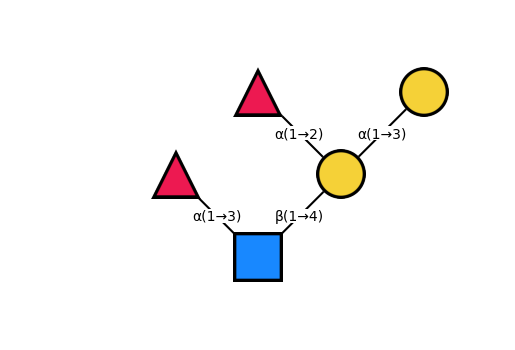

In [10]:
# build some glycan to attach
# (just using a Glycosmos ID)
glycan = gl.glycan("G04624DG")
glycan.snfg()

In [11]:
# we directly pass the sequon object to glycosylate
protein.glycosylate(glycan, sequon=new_sequon)

Protein(4tvp.prot)

And let's inspect what the protein looks like now:

In [12]:
protein.py3dmol().show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

And there we have our glycans. Hopefully you are now able to define your own sequons. Thanks for checking out this tutorial and good luck with your project using Glycosylator!